In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
import re
data_path = "/Users/willinki/GIT/Biological-Learning/experiments/emnist-performance-benchmarks-with-H"
reservoir_str = "reservoir"
random_features_str = "random-features"
full_str = "full"
mlp_str = "mlp"
x_axis = "H"

def load_grid_search_results(base_dir, match_str, field="H"):
    results = []
    for subdir in os.listdir(base_dir):
        if not match_str in subdir:
            continue
        subdir_path = os.path.join(base_dir, subdir)
        if not os.path.isdir(subdir_path):
            continue
        for h_subdir in os.listdir(subdir_path):
            match = re.search(rf"{field}=(\d+)", h_subdir)
            if not match:
                continue
            h_value = int(match.group(1))
            h_path = os.path.join(subdir_path, h_subdir)
            csv_path = os.path.join(h_path, "grid_search_results.csv")
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                df["H"] = h_value
                results.append(df)
    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame()

def load_mlp_data(base_dir, fields):
    results = []
    for root, dirs, _ in os.walk(base_dir):
        for dir in dirs:
            # Match anything between "=" and "," or end of string and extract it
            matches = [re.search(rf"({field}+)=([^,]+)", dir) for field in fields]
            if not all(matches):
                continue
            fields = {match.groups(0)[0]:match.groups(0)[1] for match in matches}
            eval_json_path = os.path.join(root, dir, "eval_results.json")
            train_json_path = os.path.join(root, dir, "train_results.json")
            if not (os.path.isfile(eval_json_path) and os.path.isfile(train_json_path)):
                continue
            with open(train_json_path, "r") as f:
                train_data = json.load(f)
            with open(eval_json_path, "r") as f:
                eval_data = json.load(f)
            data = {
                "train_acc":train_data[0]["test_acc"], 
                "eval_acc":eval_data[0]["test_acc"],
            } | fields
            results.append(data)
    return pd.DataFrame(results)

In [ ]:
# loading full data
data_full = load_grid_search_results(data_path, full_str).sort_values("H")
data_reservoir = load_grid_search_results(data_path, reservoir_str).sort_values("H")
data_random_features = load_grid_search_results(data_path, random_features_str).sort_values("H")
data_mlp = load_mlp_data(data_path+"/mlp", fields=["beta","hidden_dims"])
data_mlp["H"] = data_mlp["hidden_dims"].apply(lambda x: int(x[1:-1]))
data_mlp = data_mlp.sort_values("H")

Text(0, 0.5, 'Accuracy')

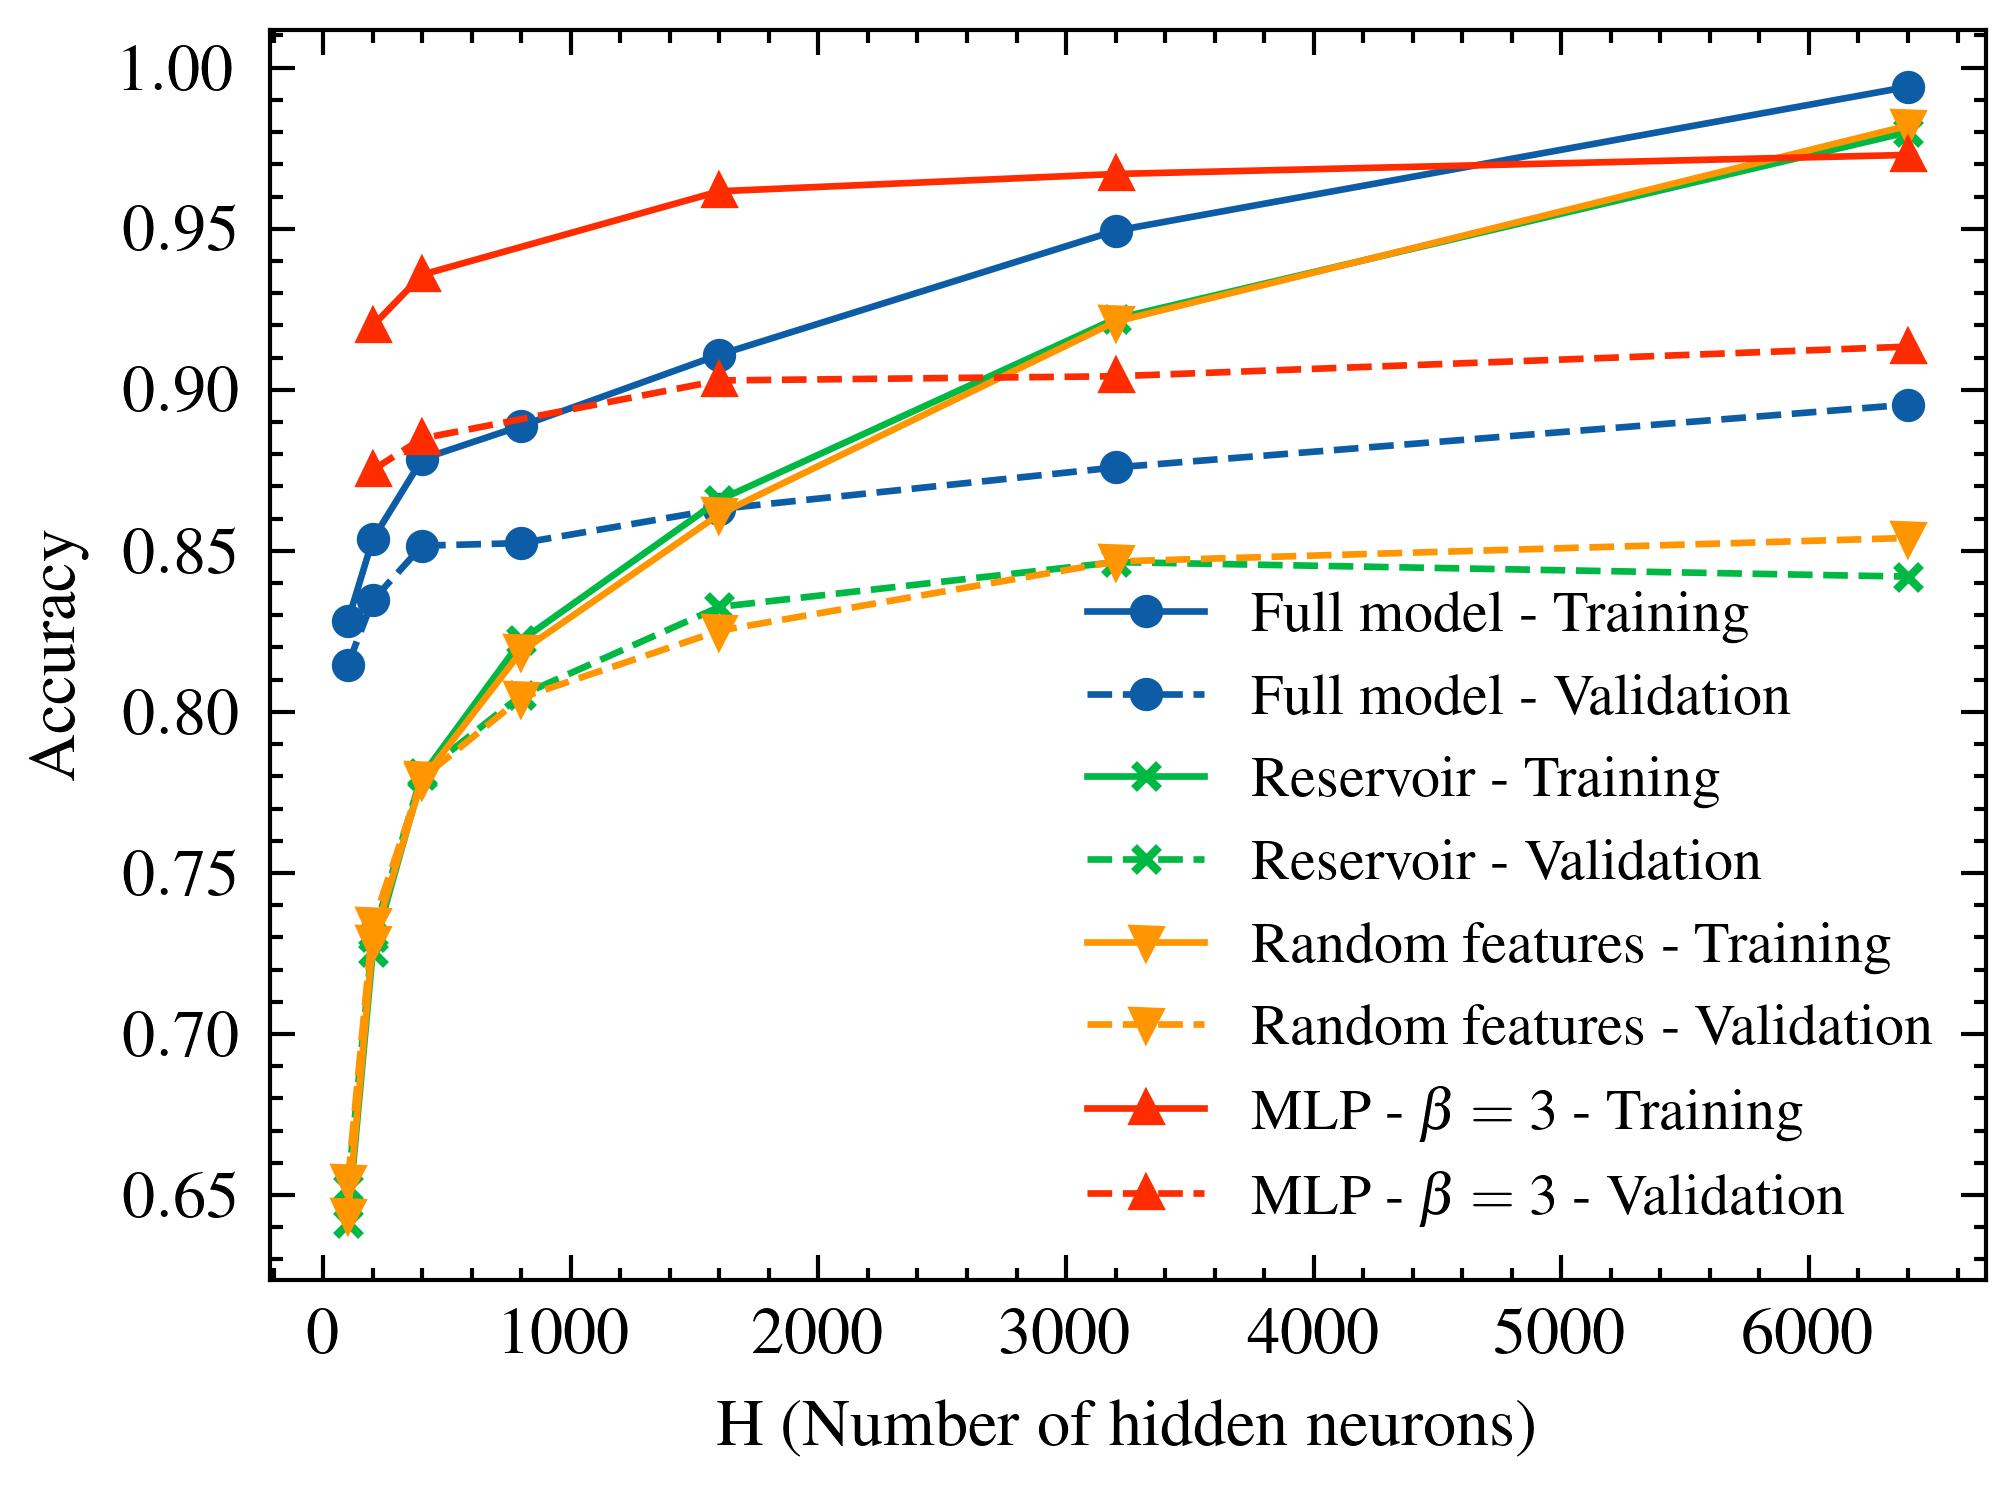

In [ ]:
import scienceplots
plt.style.use(["ieee", "science"])
fig, axs =  plt.subplots(tight_layout=True)
axs.plot(data_full["H"], data_full["final_train_acc"], label="Full model - Training", color="C0", marker="o", markersize=3, linewidth=0.8)
axs.plot(data_full["H"], data_full["final_eval_acc"], label="Full model - Validation", color="C0", marker="o", linestyle="dashed", markersize=3, linewidth=0.8)
axs.plot(data_reservoir["H"], data_reservoir["final_train_acc"], label="Reservoir - Training", color="C1", marker="x", markersize=3, linewidth=0.8)
axs.plot(data_reservoir["H"], data_reservoir["final_eval_acc"], label="Reservoir - Validation", color="C1", linestyle="dashed", marker="x", markersize=3, linewidth=0.8)
axs.plot(data_random_features["H"], data_random_features["final_train_acc"], label="Random features - Training", color="C2", marker="v", markersize=3, linewidth=0.8)
axs.plot(data_random_features["H"], data_random_features["final_eval_acc"], label="Random features - Validation", color="C2", linestyle="dashed", marker="v", markersize=3, linewidth=0.8)
axs.legend(fontsize=7, loc="lower right")
axs.set_xlabel("H (Number of hidden neurons)")
axs.set_ylabel("Accuracy")

/var/folders/by/82rbn9gj56966xymdg3dctbm0000gn/T/ipykernel_72877/151915951.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", len(betas))
/var/folders/by/82rbn9gj56966xymdg3dctbm0000gn/T/ipykernel_72877/151915951.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", len(betas))
/var/folders/by/82rbn9gj56966xymdg3dctbm0000gn/T/ipykernel_72877/151915951.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

Text(0, 0.5, 'Validation accuracy')

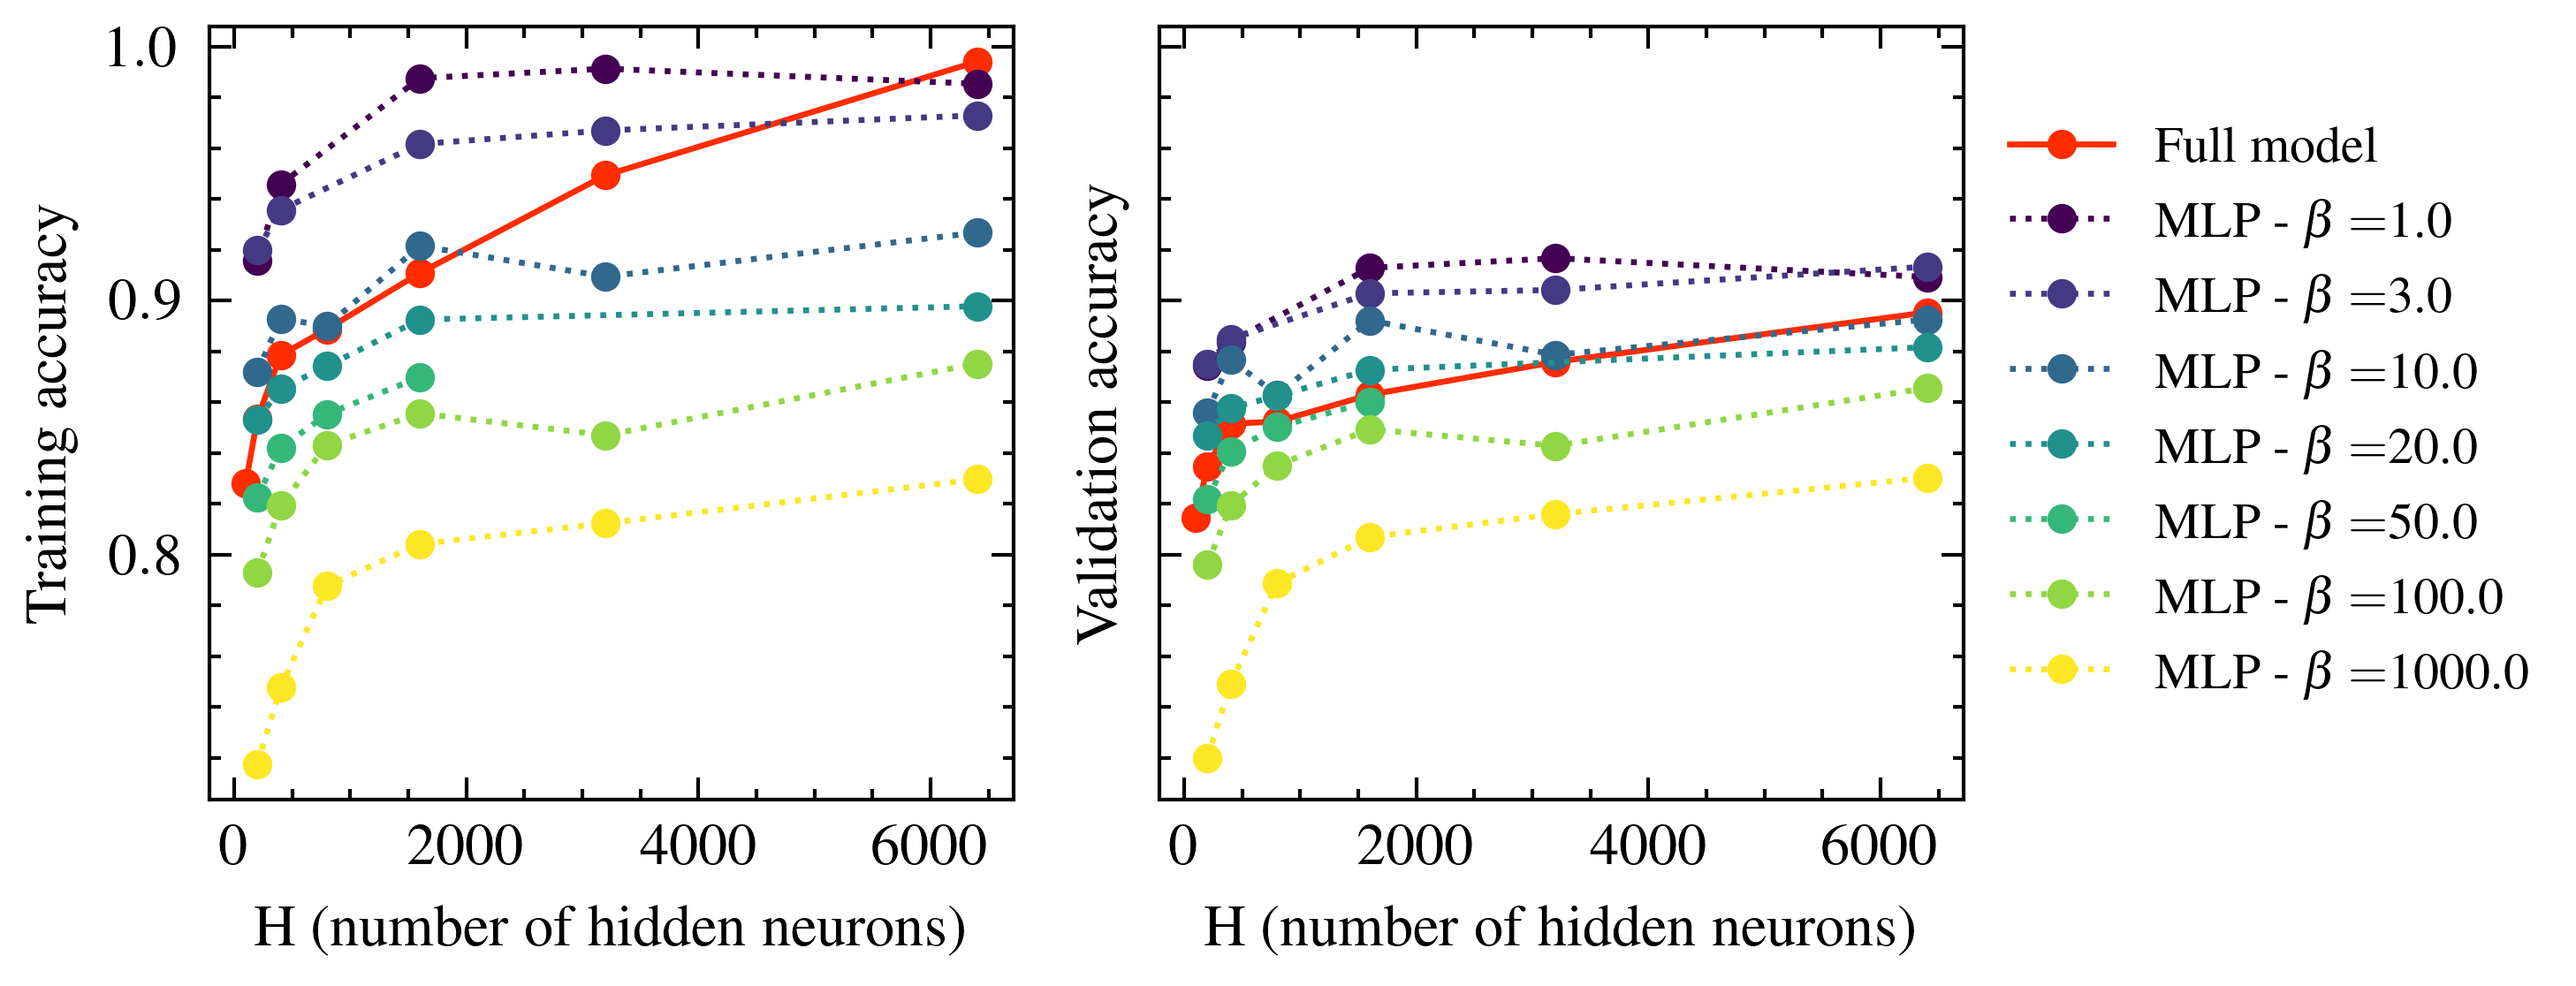

In [30]:
import numpy as np

plt.style.use(["ieee", "science"])
fig, axs =  plt.subplots(ncols=2, tight_layout=True, sharey=True, figsize=(5, 2))
axs[0].plot(data_full["H"], data_full["final_train_acc"], label="Full model", color="C3", marker="o", markersize=3, linewidth=0.8)
axs[1].plot(data_full["H"], data_full["final_eval_acc"], label="Full model", color="C3", marker="o", markersize=3, linewidth=0.8)
for beta in sorted(data_mlp["beta"].astype(float).unique()):
    betas = sorted(data_mlp["beta"].astype(float).unique())
    cmap = cm.get_cmap("viridis", len(betas))
    color = cmap(betas.index(float(beta)) / (len(betas) - 1)) if len(betas) > 1 else cmap(0)
    data_beta = data_mlp[data_mlp["beta"].astype(float) == float(beta)]
    axs[0].plot(data_beta["H"], data_beta["train_acc"], label=rf"MLP - $\beta=${beta}", marker="o", linestyle="dotted", color=color, markersize=3, linewidth=0.8)
    axs[1].plot(data_beta["H"], data_beta["eval_acc"], label=rf"MLP - $\beta=${beta}", marker="o", linestyle="dotted", color=color, markersize=3, linewidth=0.8)

axs[1].legend(fontsize=7, loc="center left", bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel("H (number of hidden neurons)")
axs[1].set_xlabel("H (number of hidden neurons)")

axs[0].set_ylabel("Training accuracy")
axs[1].set_ylabel("Validation accuracy")